### Most common words

In [2]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
top_dict = {}

for i in data.columns:
    top = data[i].sort_values(ascending = False).head(30)
    top_dict[i] = list(zip(top.index,top.values))
    
top_dict

{'louis': [('like', 110),
  ('know', 70),
  ('get', 54),
  ('dont', 53),
  ('thats', 51),
  ('youre', 50),
  ('life', 41),
  ('people', 40),
  ('thing', 31),
  ('gonna', 29),
  ('hes', 29),
  ('one', 29),
  ('theres', 28),
  ('cause', 28),
  ('every', 26),
  ('shit', 25),
  ('would', 24),
  ('time', 22),
  ('good', 22),
  ('tit', 22),
  ('think', 21),
  ('theyre', 21),
  ('right', 21),
  ('see', 20),
  ('really', 20),
  ('course', 19),
  ('guy', 19),
  ('kids', 18),
  ('even', 18),
  ('murder', 18)],
 'dave': [('like', 103),
  ('know', 79),
  ('said', 63),
  ('shit', 46),
  ('people', 43),
  ('didnt', 39),
  ('dont', 38),
  ('ahah', 38),
  ('time', 36),
  ('thats', 33),
  ('fuck', 33),
  ('fucking', 32),
  ('black', 31),
  ('man', 30),
  ('one', 30),
  ('got', 27),
  ('good', 27),
  ('would', 27),
  ('back', 26),
  ('see', 26),
  ('show', 24),
  ('get', 23),
  ('right', 22),
  ('gonna', 21),
  ('lot', 20),
  ('gay', 20),
  ('hes', 19),
  ('yeah', 19),
  ('every', 18),
  ('even', 17)],


In [26]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('*****')

louis
like, know, get, dont, thats, youre, life, people, thing, gonna
*****
dave
like, know, said, shit, people, didnt, dont, ahah, time, thats
*****
ricky
right, like, dont, know, said, yeah, fucking, got, say, youre
*****
bo
voice, know, guy, like, bro, love, girl, think, stuff, robotic
*****
bill
like, right, know, dont, gonna, got, fucking, yeah, get, shit
*****
jim
like, dont, right, fucking, went, know, youre, get, people, one
*****
john
like, know, dont, one, said, bill, clinton, would, thats, right
*****
hasan
like, know, dont, dad, get, youre, laughter, going, thats, want
*****
ali
like, know, dont, get, thats, shit, youre, gonna, lot, see
*****
anthony
like, know, dont, one, get, joke, got, said, thats, anthony
*****
mike
like, know, said, dont, one, well, get, thats, think, says
*****
joe
like, people, dont, fucking, fuck, thats, gonna, theyre, know, get
*****


#### Adding more words to stop words list

In [12]:
from collections import Counter

common_words = []
for comedian in data.columns:
    common = [word for (word, count) in top_dict[comedian]]
    for i in common:
        common_words.append(i)
        
common_words[:10]

['like',
 'know',
 'get',
 'dont',
 'thats',
 'youre',
 'life',
 'people',
 'thing',
 'gonna']

In [15]:
common = Counter(common_words).most_common()
common[:10]

[('like', 12),
 ('know', 12),
 ('dont', 12),
 ('thats', 12),
 ('people', 12),
 ('right', 12),
 ('get', 11),
 ('youre', 11),
 ('one', 11),
 ('got', 10)]

In [16]:
stop_words_list = [word for word, count in common if count > 6]
stop_words_list

['like',
 'know',
 'dont',
 'thats',
 'people',
 'right',
 'get',
 'youre',
 'one',
 'got',
 'gonna',
 'would',
 'time',
 'think',
 'see',
 'said',
 'yeah']

In [17]:
# update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_list)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_words.pkl", "wb"))
data_stop.to_pickle("dtm_stop_words.pkl")

In [55]:
data1 = pd.read_pickle('dtm_stop_words.pkl')
data1 = data1.transpose()
data1

,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,0,0,0,0,1,0,0,0,1,0,0,0
zombies,0,0,0,0,1,0,0,0,0,0,0,0
zoning,0,0,0,0,1,0,0,0,0,0,0,0
zoo,0,0,1,0,0,0,0,0,0,0,0,0


In [23]:
top_dict1 = {}

for i in data1.columns:
    top = data1[i].sort_values(ascending = False).head(30)
    top_dict1[i] = list(zip(top.index,top.values))
    
top_dict1.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [25]:
for comedian, top_words in top_dict1.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:10]]))
    print('*****')

louis
life, thing, hes, theres, cause, shit, good, tit, theyre, really
*****
dave
shit, didnt, ahah, fuck, fucking, black, man, good, gay, lot
*****
ricky
fucking, say, went, didnt, little, joke, hes, theyre, ive, thing
*****
bo
voice, guy, bro, love, girl, stuff, robotic, repeat, laughter, want
*****
bill
fucking, shit, dude, want, fuck, hes, guy, didnt, make, come
*****
jim
fucking, went, day, going, fuck, goes, thing, guns, theyre, good
*****
john
clinton, little, hey, say, cause, mom, day, way, old, cow
*****
hasan
dad, laughter, going, want, love, shes, hasan, say, applause, mom
*****
ali
shit, lot, wanna, gotta, husband, cause, women, day, pregnant, hes
*****
anthony
joke, anthony, say, day, guys, tell, grandma, thing, good, jokes
*****
mike
says, cause, jenny, goes, really, mean, point, kind, say, feel
*****
joe
fucking, fuck, theyre, shit, theres, man, house, kids, white, cause
*****


### Number of words (Vocabulary)

In [29]:
# Find the number of unique words that each comedian uses
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
9,Louis C.K.,1113
0,Ali Wong,1251
3,Bo Burnham,1427
8,John Mulaney,1478
5,Hasan Minhaj,1488
1,Anthony Jeselnik,1522
6,Jim Jefferies,1535
11,Ricky Gervais,1607
10,Mike Birbiglia,1634
7,Joe Rogan,1722


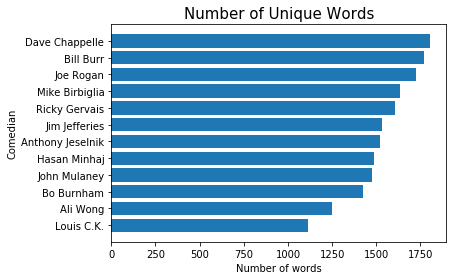

In [46]:
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(data_words))

plt.subplot(1, 1, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=15)
plt.xlabel('Number of words')
plt.ylabel('Comedian')

# plt.tight_layout()
plt.show()

### Profanity

In [49]:
common = Counter(common_words).most_common()
# common

In [62]:
# Let's isolate just these bad words
data_bad_words = data1.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)

data_profanity.columns = ['f_word', 's_word']
data_profanity.sort_values(by='f_word')

,f_word,s_word
mike,0,0
john,4,6
anthony,15,9
ali,16,34
louis,21,25
hasan,24,15
bo,38,6
ricky,60,6
dave,65,46
bill,107,64
